# Importing libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data

In [9]:
home_data=pd.read_csv('/content/drive/MyDrive/ID5055 assignments/Clustering tutorial/housing.csv',usecols=['longitude','latitude','median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


#Visualize the data

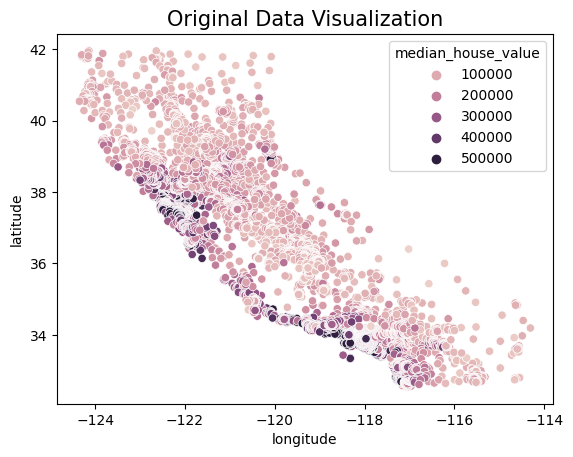

In [10]:
sns.scatterplot(home_data,x='longitude',y='latitude',hue='median_house_value')
plt.title("Original Data Visualization",fontsize=15)
plt.show()

#Split the data in train and test set

In [11]:
X_train,X_test,y_train,y_test=train_test_split(home_data[['longitude','latitude']],home_data['median_house_value'],test_size=0.33,random_state=42)

#Feature Normalization

In [12]:
X_train_norm=preprocessing.normalize(X_train)
X_test_norm=preprocessing.normalize(X_test)

#Fitting KMeans on train data

In [13]:
kmeans=KMeans(n_clusters=3,n_init='auto',random_state=0,init='random')
kmeans.fit(X_train_norm)

KMeans(init='random', n_clusters=3, n_init='auto', random_state=0)

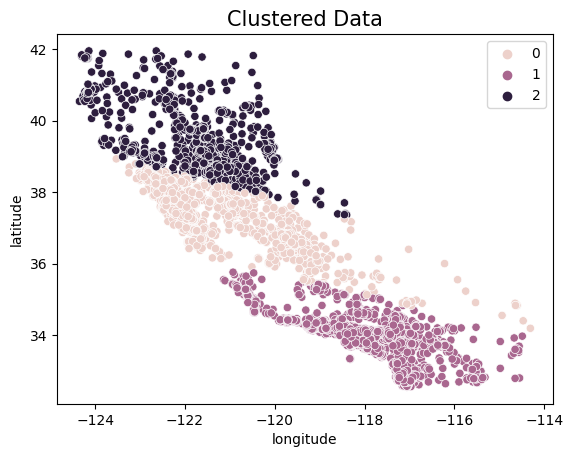

In [14]:
sns.scatterplot(X_train,x='longitude',y='latitude',hue=kmeans.labels_)
plt.title("Clustered Data",fontsize=15)
plt.show()

# Calculating silhouette score for the clustering

In [16]:
print("Silhouette_score for the above clustering is ",silhouette_score(X_train_norm,kmeans.labels_,metric='euclidean'))

Silhouette_score for the above clustering is  0.7498110566341273


In [20]:
def silhouette_scores_plot(X, min_clusters=2, max_clusters=7):
    silhouette_scores = []

    for clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=clusters, init='random', n_init='auto',random_state=0)
        labels = kmeans.fit_predict(X)
        silhouette_sc = silhouette_score(X,labels, metric='euclidean')
        silhouette_scores.append(silhouette_sc)
        print(f"For {clusters} clusters, silhouette score: {silhouette_sc}")

    best_num_clusters = np.argmax(silhouette_scores) + min_clusters
    print(f"\nBest number of clusters: {best_num_clusters} (based on maximum silhouette score)")
    # Plotting silhouette scores
    plt.figure(figsize=(10,8))
    plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o',alpha=0.6,color='r')
    plt.title("Silhouette Score vs Number of Clusters",fontsize=15)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.xticks(range(min_clusters, max_clusters + 1))
    plt.grid()
    plt.show()

#Get the score and plot it

For 2 clusters, silhouette score: 0.7756202429548272
For 3 clusters, silhouette score: 0.7498110566341273
For 4 clusters, silhouette score: 0.6690695798753084
For 5 clusters, silhouette score: 0.6399911205959964
For 6 clusters, silhouette score: 0.6645572665632798
For 7 clusters, silhouette score: 0.639121926428345

Best number of clusters: 2 (based on maximum silhouette score)


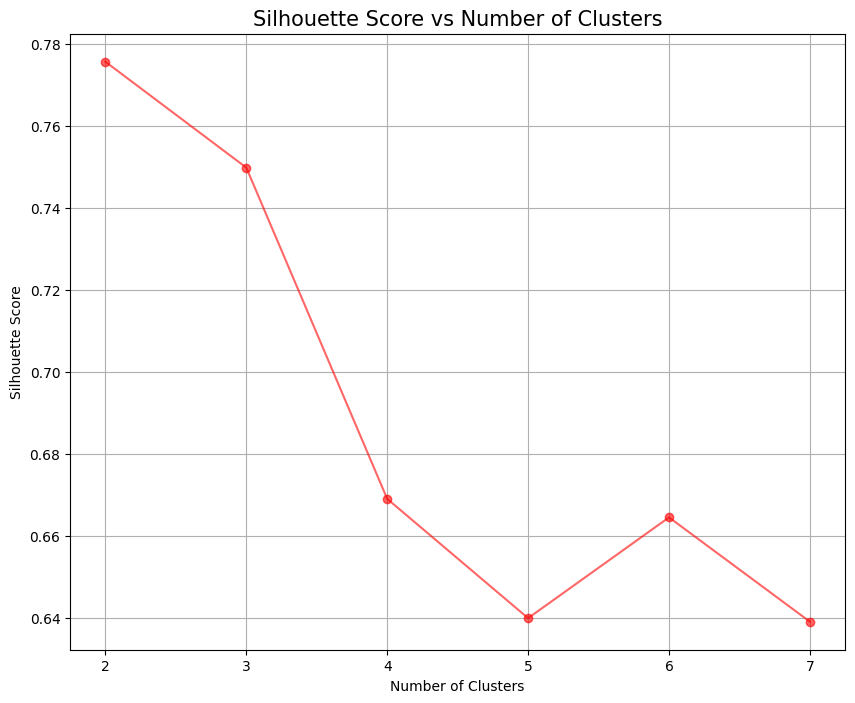

In [21]:
silhouette_scores_plot(X_train_norm)

#Evaluation on test set

For 2 clusters, silhouette score: 0.7772528479989883
For 3 clusters, silhouette score: 0.7499977788919683
For 4 clusters, silhouette score: 0.6789615755546442
For 5 clusters, silhouette score: 0.6261696959559493
For 6 clusters, silhouette score: 0.6636230486983024
For 7 clusters, silhouette score: 0.6498727103103319

Best number of clusters: 2 (based on maximum silhouette score)


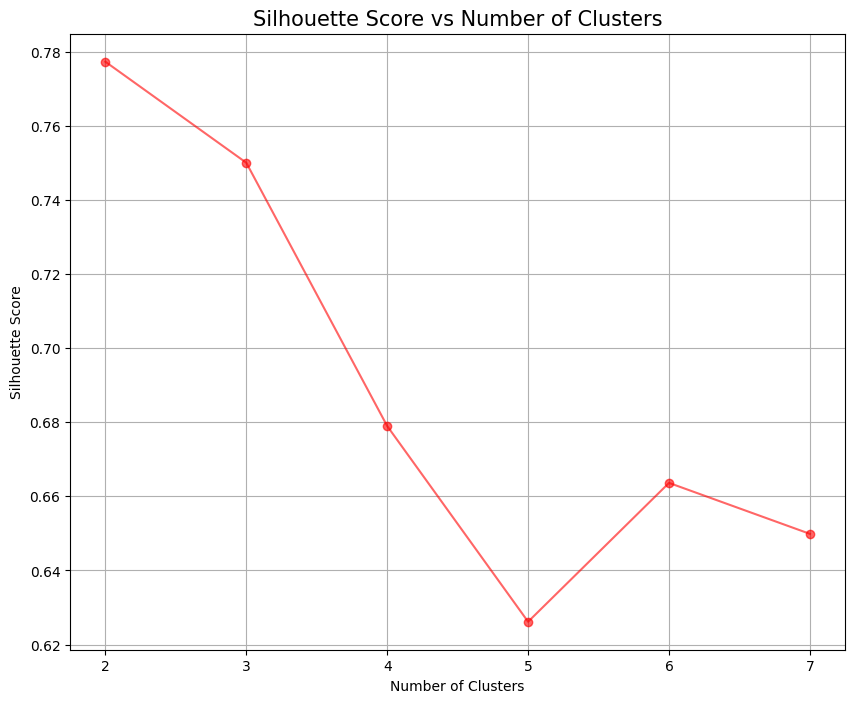

In [23]:
silhouette_scores_plot(X_test_norm)

#On both train and test set the optimal number of clusters is 2